In [1]:
import pandas as pd

In [4]:
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [5]:
data.tail()

,TV,Radio,Newspaper,Sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [7]:
data.shape

(200, 4)

In [10]:
import seaborn as sns
%matplotlib inline


Bad key "patch.force_edgecolor" on line 33 in
/home/miti/.local/lib/python2.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution

Bad key "lines.dashed_pattern" on line 18 in
/home/miti/.local/lib/python2.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution

Bad key "boxplot.meanprops.markeredgecolor" on line 369 in
/home/miti/.local/lib/python2.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution

Bad key "date.autofor

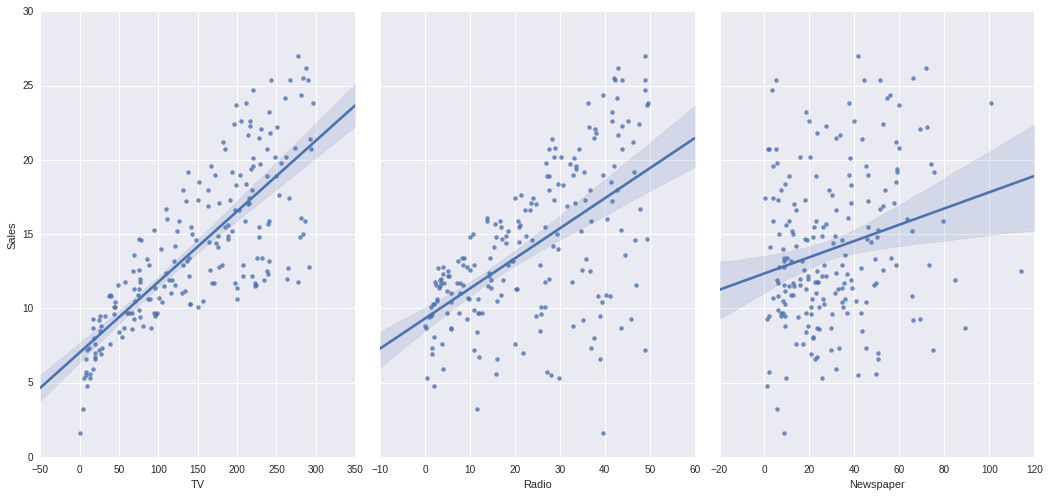

In [11]:
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=7, aspect=0.7, kind='reg')

In [13]:
feature_cols = ['TV', 'Radio', 'Newspaper']
X = data[feature_cols]
X = data[['TV', 'Radio', 'Newspaper']]
X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [14]:
print type(X)
print X.shape

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [15]:
y = data['Sales']
y = data.Sales
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [16]:
print type(y)
print y.shape

<class 'pandas.core.series.Series'>
(200,)


In [17]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)

In [18]:
print X_train.shape
print X_test.shape
print y_train.shape
print y_test.shape


(150, 3)
(50, 3)
(150,)
(50,)


In [21]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
print linreg.intercept_
print linreg.coef_

2.87696662232
[ 0.04656457  0.17915812  0.00345046]


In [23]:
zip(feature_cols, linreg.coef_)

[('TV', 0.046564567874150295),
 ('Radio', 0.17915812245088839),
 ('Newspaper', 0.0034504647111804343)]

In [24]:
y_pred = linreg.predict(X_test)

In [25]:
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

In [26]:
print (10 +0 +20 + 10)/4

from sklearn import metrics
print metrics.mean_absolute_error(true, pred)

10
10.0


In [29]:
import numpy as np
print np.sqrt((10**2+ 0**2 + 20**2 + 10**2)/4.)
print np.sqrt(metrics.mean_squared_error(true, pred))

12.2474487139
12.2474487139


In [30]:
print np.sqrt(metrics.mean_squared_error(y_test,y_pred))

1.40465142303


In [31]:
feature_cols = ['TV', 'Radio']
X = data[feature_cols]
X = data[['TV', 'Radio']]
X.head()

,TV,Radio
1,230.1,37.8
2,44.5,39.3
3,17.2,45.9
4,151.5,41.3
5,180.8,10.8


In [33]:
y = data.Sales
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)
linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
y_pred = linreg.predict(X_test)
print np.sqrt(metrics.mean_squared_error(y_test,y_pred))

1.38790346994
